In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from slab import SlabOut
import plot_chem
from matplotlib import gridspec

In [2]:
dir_out = "/tigress/munan/pdr/"

In [9]:
slab_simple = SlabOut(dir_out+"out_example_simple/") 
slab_simple.ReadRates()
slab_simple.ReadThermo()

Set xC=1.60e-04, xO=3.20e-04.
Calculating E assuming CvCold and xHe=0.1 ...


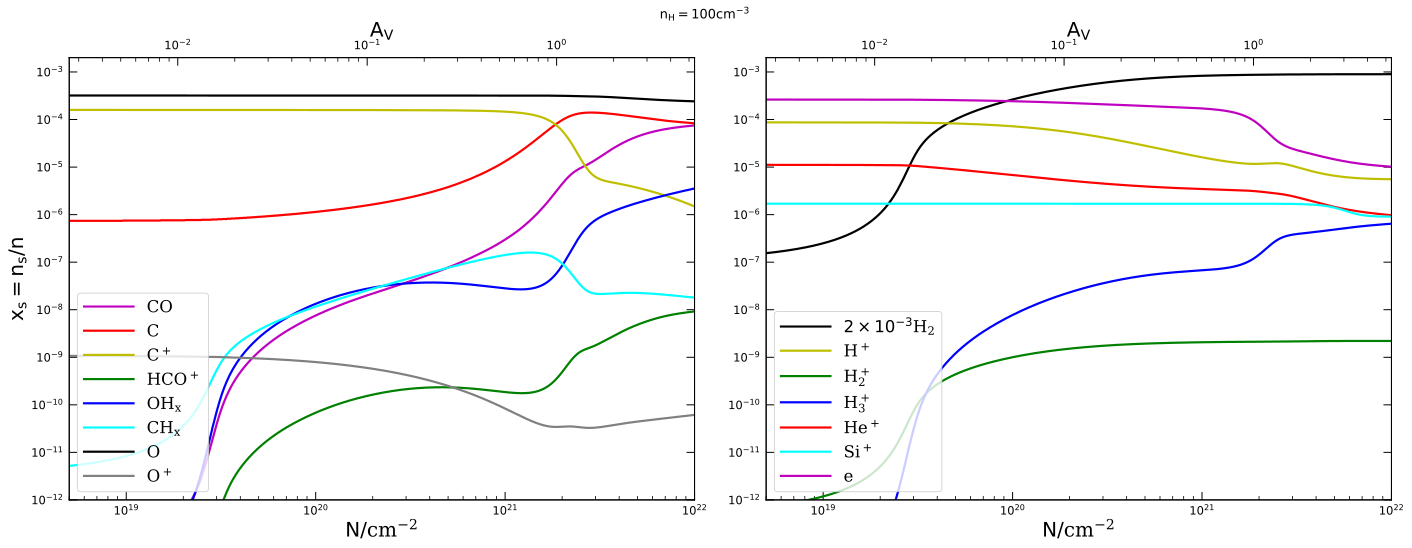

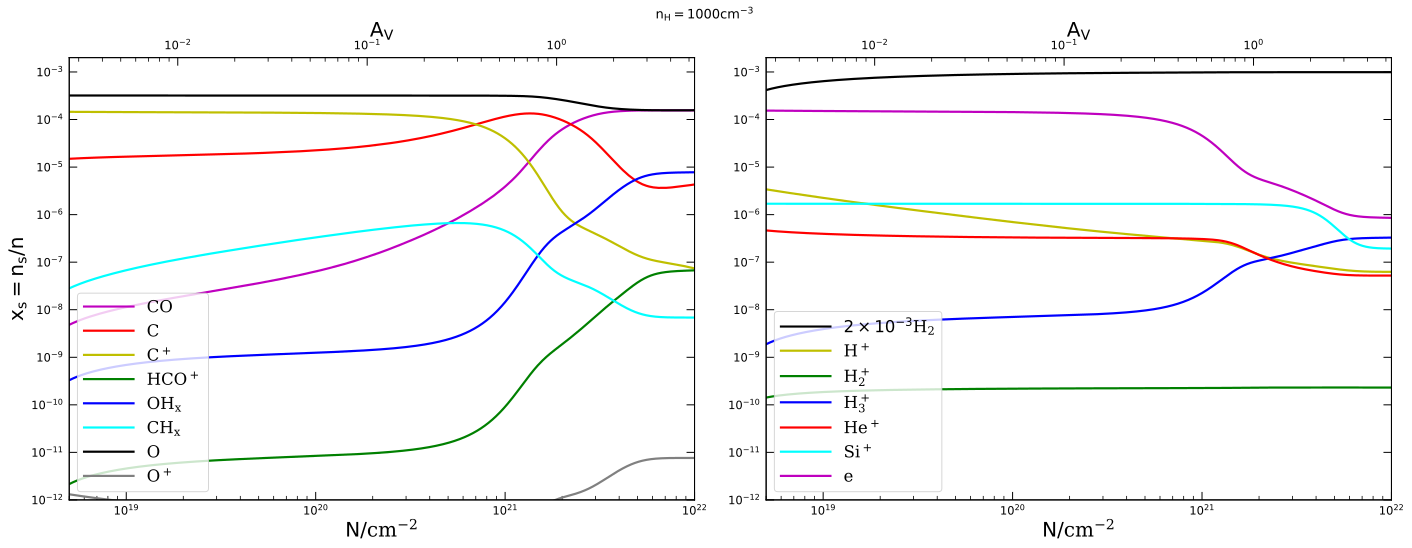

In [12]:
#plot chemical abundances of species
plot_chem.Plot_xi([slab_simple], slab_simple.nH, 1.)

In [ ]:
#temperature
fig = plt.figure(figsize=[6, 8])
ax = fig.add_subplot(111)
plot_chem.plot_thermo_nH(ax, slab_simple, 100)

In [17]:
#all reactions included in the calculations
for reaction in slab_simple.rates_list:
    print(reaction)

cr  +   H2 ->  H2+
cr  +  *He ->  He+
cr  +   *H ->   H+
cr  +   *C ->   C+
cr  +   CO ->   *O
cr  +   CO -> HCO+
cr  +   *S ->   S+
cr  +  *Si ->  Si+
 H3+  +   *C ->  CHx  +   H2
 H3+  +   *O ->  OHx  +   H2
 H3+  +   CO -> HCO+  +   H2
 He+  +   H2 ->   H+  +  *He
 He+  +   CO ->   C+  +   *O
  C+  +   H2 ->  CHx  +   *H
  C+  +  OHx -> HCO+  +   *H
 CHx  +   *O ->   CO  +   *H
 OHx  +   *C ->   CO  +   *H
 He+  +   *e ->  *He  +   *H
 H3+  +   *e ->   H2  +   *H
  C+  +   *e ->   *C  +   *H
HCO+  +   *e ->   CO  +   *H
 H2+  +   H2 ->  H3+  +   *H
  H+  +   *e ->   *H  +   *H
  H2  +   *H ->   *H  +   *H
  H2  +   H2 ->   H2  +   *H
  *H  +   *e ->   H+  +   *e
 H3+  +   *e ->   *H  +   *H
 He+  +   H2 ->  H2+  +  *He
 CHx  +   *H ->   H2  +   *C
 OHx  +   *O ->   *O  +   *H
  C+  +   H2 ->   *C  +   *H
  S+  +   *e ->   *S  +   *H
  C+  +   *S ->   S+  +   *C
 Si+  +   *e ->  *Si  +   *H
  C+  +  *Si ->  Si+  +   *C
 H3+  +   *O ->   H2  +   *O
 He+  +  OHx ->   O+  +  *He
 H2+  +

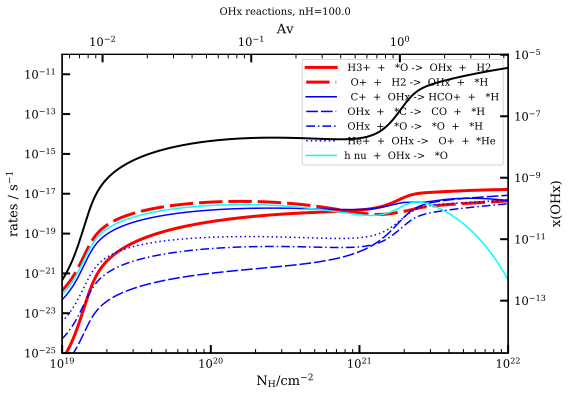

In [19]:
#reaction rates for the reactions above
plot_chem.plot_rates_nH(slab_simple, 100., "OHx")

In [ ]:
slab_large = SlabOut(dir_out+"out_example_large/") 
slab_large.ReadRates()
slab_large.ReadThermo()

Set xC=1.60e-04, xO=3.20e-04.
Calculating E assuming CvCold and xHe=0.1 ...


In [ ]:
fig = plt.figure(figsize=[6,5])
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 0.05])
ax = fig.add_subplot(gs[0,0])
cax = ax.pcolormesh(slab_large.NHM.transpose(), slab_large.nHM.transpose(), 
                    np.log10(slab_large.abd["T"]).transpose(), vmin=np.log10(10), vmax=np.log10(150),
                    rasterized=True)
ax.set_xlabel("$N/\mathrm{cm^{-2}}$")
ax.set_ylabel("$n/\mathrm{cm^{-3}}$")
AV_range = np.array([0.0056, 5])
ax.set_xlim(AV_range*1.87e21)
ax.set_yscale("log")
ax.set_xscale("log")
ax3 = ax.twiny()
ax3.set_ylim(slab_large.nH[0], slab_large.nH[-1])
ax3.set_xlim(AV_range)
ax3.set_xscale(ax.get_xscale())
ax3.set_xlabel("$A_V$")
cax.set_edgecolor("face")
axC0 = fig.add_subplot(gs[0,1])
ticks_cbar0 = np.array([10, 15, 20, 25, 30, 40, 50, 100, 150])
ticks_cbar_labels1 = ["$10^1$"] + ["$10^2$"] + ["$10^3$"] + ["$10^4$"]
cbar0=fig.colorbar(cax, ax=ax, cax=axC0, ticks=np.log10(ticks_cbar0))
cbar0.ax.set_yticklabels(ticks_cbar0)
cbar0.ax.minorticks_off()
cbar0.set_label("$T/\mathrm{K}$")
cbar0.solids.set_edgecolor("face")